# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.


In [12]:
# !git clone https://github.com/ultralytics/yolov5  # clone - reference

%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 a339661 Python-3.10.4 torch-1.12.1+cu102 CPU


Setup complete ✅ (8 CPUs, 15.4 GB RAM, 70.5/233.2 GB disk)


# Training

used yolov5s weights and New yaml file(mentioned 5 classes and path for 5 classes of labeled images approx 35 to 40 images from each class)

used https://www.makesense.ai/ for labeling

## Trainig will be much faster with GPUs

 - better use colab if no GPU in system (create all necessay requirments in a folder including training images and push to git hub)
 - clone git hub repo to colab and start training (much faster - uploding trainig images or zip to cloab might take more time) 
                                                   

In [ ]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import os
import cv2
import PIL

path_ = '../NP_Dataset/Electric/'
for file in os.listdir(path_):
    img = load_img(f'{path}{file}')
    transform = T.Resize((416, 416))
    resized_img = transform(img)
    resized_img.save(f'output_images/resize_{file}')

### coverted all images to same size and did some image agumentation and then labeled all images


```
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import os
import cv2
import PIL

path_ = '../NP_Dataset/Electric/'
for file in os.listdir(path_):
    img = load_img(f'{path}{file}')
    transform = T.Resize((416, 416))
    resized_img = transform(img)
    resized_img.save(f'output_images/resize_{file}')
    
    transform_blur = T.GaussianBlur(7)
    blur_img = transform_blur(resized_img)
    blur_img.save(f'output_images/blur_{file}')
    
    bright_img = T.functional.adjust_brightness(resized_img, brightness_factor=1.5)
    dark_img = T.functional.adjust_brightness(resized_img, brightness_factor=0.5)
    bright_img.save(f'output_images/bright_{file}')
    dark_img.save(f'output_images/dark_{file}')   

    contrast_img_hi = T.functional.adjust_contrast(resized_img,contrast_factor=3.3)
    contrast_img_lo = T.functional.adjust_contrast(resized_img,contrast_factor=0.3)
    contrast_img_hi.save(f'output_images/contrast_hi_{file}')
    contrast_img_lo.save(f'output_images/contrast_lo_{file}')
    
    sharp_img = T.functional.adjust_sharpness(resized_img,sharpness_factor=10)
    sharp_img.save(f'output_images/sharp_{file}')
    smooth_img = T.functional.adjust_sharpness(resized_img,sharpness_factor=0.1)
    smooth_img.save(f'output_images/smooth_{file}')
    
    equ_img = T.functional.equalize(resized_img)
    equ_img.save(f'output_images/equ_{file}')
    
#     transform = T.Compose([T.RandomRotation(degrees=10)])
#     rotate_img = transform(resized_img)
#     rotate_img.save(f'output_images/rotate_{file}')

```

!python train.py --img 640 --batch 15 --epochs 105 --data Nplate.yaml --weights yolov5s.pt --cache

In [17]:
# !pip install easyocr

In [4]:
# pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.7.1/index.html
# !pip install mmdet==2.11.0

In [4]:
# !pip install transformers
# !pip install python-doctr

In [ ]:
# # Install mmcv-full thus we could use CUDA operators
# !pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

# # Install mmdetection
# !pip install mmdet

# # Install mmocr
# !git clone https://github.com/open-mmlab/mmocr.git
# %cd mmocr
# !pip install -r requirements.txt
# !pip install -v -e .

In [7]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

import requests 

from PIL import Image

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten") 

model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

# load image from the IAM dataset 

# url = "https://fki.tic.heia-fr.ch/static/img/a01-122-02.jpg" 

# image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
image = Image.open('detected_images/6766b906-332d-11ed-8d61-09c306cc5714.jpg').convert("RGB")

pixel_values = processor(image, return_tensors="pt").pixel_values 

generated_ids = model.generate(pixel_values)

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0] 

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/home/riyaz/.local/lib/python3.10/site-packages/transformers/generation_utils.py:1202: UserWarning: Neither `max_length` nor `max_new_tokens` have been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.

In [8]:
print(generated_text)

1948 73 )


In [9]:
from mmocr.utils.ocr import MMOCR
mmocr = MMOCR(det=None, recog='SAR')
mmocr.readtext('detected_images/6766b906-332d-11ed-8d61-09c306cc5714.jpg', print_result=True, output='outputs/test_11_pred.jpg')

load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth


/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


{'text': 'RL07CC', 'score': 0.024492821811387937}



[{'text': 'RL07CC', 'score': 0.024492821811387937}]

In [11]:
from mmocr.utils.ocr import MMOCR
mmocr = MMOCR(det='TextSnake', recog='SAR')
mmocr.readtext('detected_images/6766b906-332d-11ed-8d61-09c306cc5714.jpg', print_result=True, output='outputs/test1_8_pred.jpg')

load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth
load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth


/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '
/home/riyaz/.local/lib/python3.10/site-packages/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/mmocr/mmocr/models/textdet/postprocess/utils.py:51: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecat

{'filename': '6766b906-332d-11ed-8d61-09c306cc5714', 'text': ['Y3865', 'IND]', 'KLO7C']}



[{'filename': '6766b906-332d-11ed-8d61-09c306cc5714',
  'text': ['Y3865', 'IND]', 'KLO7C']}]

In [13]:
# text[0]['text']

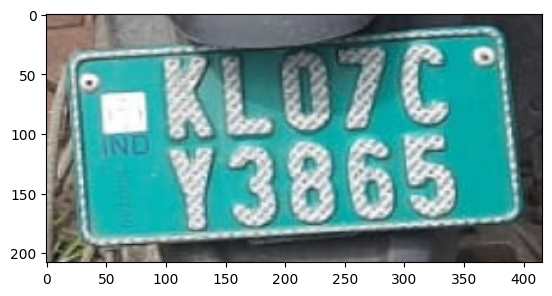

In [16]:
# Visualize the results
import mmcv
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('detected_images/6766b906-332d-11ed-8d61-09c306cc5714.jpg')
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

## created custom detect file (detect_test.py)
 - will read the plate and wirte (append) to csv format (image name, plate and class) - used mmocr/ easyocr
 - automatically save the cropped/detected images to detected_imgs folder
 - also we can use the following arguments from default file to store images, save text, visualize etc.. for each runs
        
    parser.add_argument('--weights', nargs='+', type=str, default='runs/train/exp/weights/best.pt', help='model path(s)')
    
    parser.add_argument('--source', type=str, default= 0, help='file/dir/URL/glob, 0 for webcam')
    
    parser.add_argument('--data', type=str, default='data/Nplate.yaml', help='(optional) dataset.yaml path')
    
    parser.add_argument('--imgsz', '--img', '--img-size', nargs='+', type=int, default=[640], help='inference size h,w')
    
    parser.add_argument('--conf-thres', type=float, default=0.25, help='confidence threshold')
    
    parser.add_argument('--iou-thres', type=float, default=0.45, help='NMS IoU threshold')
    
    parser.add_argument('--max-det', type=int, default=1000, help='maximum detections per image')
    
    parser.add_argument('--device', default='', help='cuda device, i.e. 0 or 0,1,2,3 or cpu')
    
    parser.add_argument('--view-img', action='store_true', help='show results')
    
    parser.add_argument('--save-txt', action='store_true', help='save results to *.txt')
    
    parser.add_argument('--save-conf', action='store_true', help='save confidences in --save-txt labels')
    
    parser.add_argument('--save-crop', action='store_true', help='save cropped prediction boxes')
    
    parser.add_argument('--nosave', action='store_true', help='do not save images/videos')
    
    parser.add_argument('--classes', nargs='+', type=int, help='filter by class: --classes 0, or --classes 0 2 3')
    
    parser.add_argument('--agnostic-nms', action='store_true', help='class-agnostic NMS')
    
    parser.add_argument('--augment', action='store_true', help='augmented inference')
    
    parser.add_argument('--visualize', action='store_true', help='visualize features')
    
    parser.add_argument('--update', action='store_true', help='update all models')
    
    parser.add_argument('--project', default='runs/detect', help='save results to project/name')
    
    parser.add_argument('--name', default='exp', help='save results to project/name')
    
    parser.add_argument('--exist-ok', action='store_true', help='existing project/name ok, do not increment')
    
    parser.add_argument('--line-thickness', default=3, type=int, help='bounding box thickness (pixels)')
    
    parser.add_argument('--hide-labels', default=False, action='store_true', help='hide labels')
    
    parser.add_argument('--hide-conf', default=False, action='store_true', help='hide confidences')
    
    parser.add_argument('--half', action='store_true', help='use FP16 half-precision inference')
    
    parser.add_argument('--dnn', action='store_true', help='use OpenCV DNN for ONNX inference')

## Edited File

In [24]:
# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
"""
Run YOLOv5 detection inference on images, videos, directories, globs, YouTube, webcam, streams, etc.

Usage - sources:
    $ python detect.py --weights yolov5s.pt --source 0                               # webcam
                                                     img.jpg                         # image
                                                     vid.mp4                         # video
                                                     path/                           # directory
                                                     'path/*.jpg'                    # glob
                                                     'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                                                     'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream

Usage - formats:
    $ python detect.py --weights yolov5s.pt                 # PyTorch
                                 yolov5s.torchscript        # TorchScript
                                 yolov5s.onnx               # ONNX Runtime or OpenCV DNN with --dnn
                                 yolov5s.xml                # OpenVINO
                                 yolov5s.engine             # TensorRT
                                 yolov5s.mlmodel            # CoreML (macOS-only)
                                 yolov5s_saved_model        # TensorFlow SavedModel
                                 yolov5s.pb                 # TensorFlow GraphDef
                                 yolov5s.tflite             # TensorFlow Lite
                                 yolov5s_edgetpu.tflite     # TensorFlow Edge TPU
"""
import cv2
import pytesseract
import easyocr
from mmocr.utils.ocr import MMOCR
import mmocr
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import argparse
import os
import platform
import sys
from pathlib import Path
import csv
import uuid
import torch
import torchvision
import torchvision.transforms as T

import torch.backends.cudnn as cudnn

# FILE = Path(__file__).resolve()
# ROOT = FILE.parents[0]  # YOLOv5 root directory
# if str(ROOT) not in sys.path:
#     sys.path.append(str(ROOT))  # add ROOT to PATH
# ROOT = Path(os.path.relpath(ROOT, Path.cwd()))  # relative

from models.common import DetectMultiBackend
from utils.dataloaders import IMG_FORMATS, VID_FORMATS, LoadImages, LoadStreams
from utils.general import (LOGGER, Profile, check_file, check_img_size, check_imshow, check_requirements, colorstr, cv2,
                           increment_path, non_max_suppression, print_args, scale_coords, strip_optimizer, xyxy2xywh)
from utils.plots import Annotator, colors, save_one_box
from utils.torch_utils import select_device, smart_inference_mode


@smart_inference_mode()
def run(
        weights='runs/train/exp/weights/best.pt',  # model.pt path(s)
        source='../test_images/',  # file/dir/URL/glob, 0 for webcam
        data= 'data/Nplate.yaml',  # dataset.yaml path
        imgsz=(640, 640),  # inference size (height, width)
        conf_thres=0.25,  # confidence threshold
        iou_thres=0.45,  # NMS IOU threshold
        max_det=1000,  # maximum detections per image
        device='',  # cuda device, i.e. 0 or 0,1,2,3 or cpu
        view_img=False,  # show results
        save_txt=False,  # save results to *.txt
        save_conf=False,  # save confidences in --save-txt labels
        save_crop=False,  # save cropped prediction boxes
        nosave=False,  # do not save images/videos
        classes=None,  # filter by class: --class 0, or --class 0 2 3
        agnostic_nms=False,  # class-agnostic NMS
        augment=False,  # augmented inference
        visualize=False,  # visualize features
        update=False,  # update all models
        project='runs/detect',  # save results to project/name
        name='exp',  # save results to project/name
        exist_ok=False,  # existing project/name ok, do not increment
        line_thickness=3,  # bounding box thickness (pixels)
        hide_labels=False,  # hide labels
        hide_conf=False,  # hide confidences
        half=False,  # use FP16 half-precision inference
        dnn=False,  # use OpenCV DNN for ONNX inference
):
    source = str(source)
    save_img = not nosave and not source.endswith('.txt')  # save inference images
    is_file = Path(source).suffix[1:] in (IMG_FORMATS + VID_FORMATS)
    is_url = source.lower().startswith(('rtsp://', 'rtmp://', 'http://', 'https://'))
    webcam = source.isnumeric() or source.endswith('.txt') or (is_url and not is_file)
    if is_url and is_file:
        source = check_file(source)  # download

    # Directories
    save_dir = increment_path(Path(project) / name, exist_ok=exist_ok)  # increment run
    (save_dir / 'labels' if save_txt else save_dir).mkdir(parents=True, exist_ok=True)  # make dir

    # Load model
    device = select_device(device)
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
    stride, names, pt = model.stride, model.names, model.pt
    imgsz = check_img_size(imgsz, s=stride)  # check image size

    # Dataloader
    if webcam:
        view_img = check_imshow()
        cudnn.benchmark = True  # set True to speed up constant image size inference
        dataset = LoadStreams(source, img_size=imgsz, stride=stride, auto=pt)
        bs = len(dataset)  # batch_size
    else:
        dataset = LoadImages(source, img_size=imgsz, stride=stride, auto=pt)
        bs = 1  # batch_size
    vid_path, vid_writer = [None] * bs, [None] * bs

    # Run inference
    model.warmup(imgsz=(1 if pt else bs, 3, *imgsz))  # warmup
    seen, windows, dt = 0, [], (Profile(), Profile(), Profile())
    for path, im, im0s, vid_cap, s in dataset:
        with dt[0]:
            im = torch.from_numpy(im).to(device)
            im = im.half() if model.fp16 else im.float()  # uint8 to fp16/32
            im /= 255  # 0 - 255 to 0.0 - 1.0
            if len(im.shape) == 3:
                im = im[None]  # expand for batch dim

        # Inference
        with dt[1]:
            visualize = increment_path(save_dir / Path(path).stem, mkdir=True) if visualize else False
            pred = model(im, augment=augment, visualize=visualize)

        # NMS
        with dt[2]:
            pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det)

        # Second-stage classifier (optional)
        # pred = utils.general.apply_classifier(pred, classifier_model, im, im0s)

        # Process predictions
        for i, det in enumerate(pred):  # per image
            seen += 1
            if webcam:  # batch_size >= 1
                p, im0, frame = path[i], im0s[i].copy(), dataset.count
                s += f'{i}: '
            else:
                p, im0, frame = path, im0s.copy(), getattr(dataset, 'frame', 0)

            p = Path(p)  # to Path
            save_path = str(save_dir / p.name)  # im.jpg
            txt_path = str(save_dir / 'labels' / p.stem) + ('' if dataset.mode == 'image' else f'_{frame}')  # im.txt
            s += '%gx%g ' % im.shape[2:]  # print string
            gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  # normalization gain whwh
            imc = im0.copy() if save_crop else im0  # for save_crop
            annotator = Annotator(im0, line_width=line_thickness, example=str(names))
            

            if len(det):     
         
                # Rescale boxes from img_size to im0 size
                det[:, :4] = scale_coords(im.shape[2:], det[:, :4], im0.shape).round()

                # Print results
                for c in det[:, -1].unique():
                    n = (det[:, -1] == c).sum()  # detections per class
                    s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string
  
                # Write results
                for *xyxy, conf, cls in reversed(det):
                    
                    # saving detected portion and write results to csv          
                    if save_txt:  # Write to file
                        
                        xywh = (xyxy2xywh(torch.tensor(xyxy).view(1, 4)) / gn).view(-1).tolist()  # normalized xywh
                        line = (cls, *xywh, conf) if save_conf else (cls, *xywh)  # label format
                        with open(f'recognized.txt', 'a') as f:
                            f.write(('%g ' * len(line)).rstrip() % line + '\n')
                        
                    if save_img or save_crop or view_img:  # Add bbox to image
                        
                        def save_results(text, crp_img, class_, csv_filename, folder_path):
                            image_name = '{}.jpg'.format(uuid.uuid1())

                            cv2.imwrite(os.path.join(folder_path, image_name), crp_img)

                            with open(csv_filename, mode='a', newline='') as f:
                                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                                csv_writer.writerow([image_name, text, class_])
                    
#                     if save_crop:
                        c = int(cls)  # integer class
                        save_one_box(xyxy, imc, file=save_dir/'crops'/f'{p.stem}_{names[c]}.jpg', BGR=True)
                        
                        crp_img = imc[int(xyxy[1]):int(xyxy[3]), int(xyxy[0]):int(xyxy[2])]

                        bigger = cv2.resize(crp_img, (416, 208))
                        bfilter = cv2.bilateralFilter(bigger, 11, 17, 17)

                        # gray = cv2.cvtColor(bigger, cv2.COLOR_BGR2GRAY)  

                        alpha = 1.2 # Contrast control (1.0-3.0)
                        beta = 0 # Brightness control (0-100)
                        adjusted = cv2.convertScaleAbs(bfilter, alpha=alpha, beta=beta)

                        cv2.imshow('adjusted', adjusted)
                        cv2.waitKey(0)
                        cv2.destroyAllWindows()

                        # mmocr = MMOCR(det=None, recog='CRNN_TPS')
                        # mmocr = MMOCR(det='PS_CTW', recog='SAR', kie='SDMGR')
                        mmocr = MMOCR(det='TextSnake', recog='SAR')
                        # mmocr = MMOCR(det='TextSnake', recog='SAR', kie='SDMGR', config_dir='/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/mmocr/configs/')
                        text = mmocr.readtext(adjusted, print_result=False, output='outputs/test.jpg')

                        # reader = easyocr.Reader(['en'])
                        # ocr_result = []
                        # ocr_result = reader.readtext(bfilter)

                        if text != []:
                            text_plate = text[0]['text']
                            print(text_plate)
                            print(names[c])
                            print(conf)
                            if os.path.isdir('detected_images') is False: 
                                os.mkdir('detected_images') 
                            save_results(text_plate, bigger, names[c], 'detection_results.csv', 'detected_images/')
                        else:
                            text_plate = ''   

                        label = None if hide_labels else (names[c] if hide_conf else f'{conf:.2f}{names[c]}{text_plate}')
                        annotator.box_label(xyxy, label, color=colors(c, True))
                

            # Stream results
            im0 = annotator.result()
            if view_img:
                if platform.system() == 'Linux' and p not in windows:
                    windows.append(p)
                    cv2.namedWindow(str(p), cv2.WINDOW_NORMAL | cv2.WINDOW_KEEPRATIO)  # allow window resize (Linux)
                    cv2.resizeWindow(str(p), im0.shape[1], im0.shape[0])
                    
                cv2.imshow(str(p), im0)
                cv2.waitKey(1)  # 1 millisecond
                key = cv2.waitKey(5)
                if key == 27:    
                    vid_cap.release()
                    cv2.destroyAllWindows()


            # Save results (image with detections)
            if save_img:
                if dataset.mode == 'image':
                    cv2.imwrite(save_path, im0)
                else:  # 'video' or 'stream'
                    if vid_path[i] != save_path:  # new video
                        vid_path[i] = save_path
                        if isinstance(vid_writer[i], cv2.VideoWriter):
                            vid_writer[i].release()  # release previous video writer
                        if vid_cap:  # video
                            fps = vid_cap.get(cv2.CAP_PROP_FPS)
                            w = int(vid_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                            h = int(vid_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
                        else:  # stream
                            fps, w, h = 30, im0.shape[1], im0.shape[0]
                        save_path = str(Path(save_path).with_suffix('.mp4'))  # force *.mp4 suffix on results videos
                        vid_writer[i] = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))
                    vid_writer[i].write(im0)

        # Print time (inference-only)
        LOGGER.info(f"{s}{'' if len(det) else '(no detections), '}{dt[1].dt * 1E3:.1f}ms")

    # Print results
    t = tuple(x.t / seen * 1E3 for x in dt)  # speeds per image
    LOGGER.info(f'Speed: %.1fms pre-process, %.1fms inference, %.1fms NMS per image at shape {(1, 3, *imgsz)}' % t)
    if save_txt or save_img:
        s = f"\n{len(list(save_dir.glob('labels/*.txt')))} labels saved to {save_dir / 'labels'}" if save_txt else ''
        LOGGER.info(f"Results saved to {colorstr('bold', save_dir)}{s}")
    if update:
        strip_optimizer(weights[0])  # update model (to fix SourceChangeWarning)
        
#     file.close    
# https://youtu.be/Z4eOnPTp2Aw

def parse_opt():
    parser = argparse.ArgumentParser()
    parser.add_argument('--weights', nargs='+', type=str, default='runs/train/exp/weights/best.pt', help='model path(s)')
    parser.add_argument('--source', type=str, default= '../test_images/car.jpg', help='file/dir/URL/glob, 0 for webcam')
    parser.add_argument('--data', type=str, default='data/Nplate.yaml', help='(optional) dataset.yaml path')
    parser.add_argument('--imgsz', '--img', '--img-size', nargs='+', type=int, default=[832], help='inference size h,w')
    parser.add_argument('--conf-thres', type=float, default=0.60, help='confidence threshold')
    parser.add_argument('--iou-thres', type=float, default=0.45, help='NMS IoU threshold')
    parser.add_argument('--max-det', type=int, default=1000, help='maximum detections per image')
    parser.add_argument('--device', default='', help='cuda device, i.e. 0 or 0,1,2,3 or cpu')
    parser.add_argument('--view-img', action='store_true', help='show results')
    parser.add_argument('--save-txt', action='store_true', help='save results to *.txt')
    parser.add_argument('--save-conf', action='store_true', help='save confidences in --save-txt labels')
    parser.add_argument('--save-crop', action='store_true', help='save cropped prediction boxes')
    parser.add_argument('--nosave', action='store_true', help='do not save images/videos')
    parser.add_argument('--classes', nargs='+', type=int, help='filter by class: --classes 0, or --classes 0 2 3')
    parser.add_argument('--agnostic-nms', action='store_true', help='class-agnostic NMS')
    parser.add_argument('--augment', action='store_true', help='augmented inference')
    parser.add_argument('--visualize', action='store_true', help='visualize features')
    parser.add_argument('--update', action='store_true', help='update all models')
    parser.add_argument('--project', default='runs/detect', help='save results to project/name')
    parser.add_argument('--name', default='exp', help='save results to project/name')
    parser.add_argument('--exist-ok', action='store_true', help='existing project/name ok, do not increment')
    parser.add_argument('--line-thickness', default=3, type=int, help='bounding box thickness (pixels)')
    parser.add_argument('--hide-labels', default=False, action='store_true', help='hide labels')
    parser.add_argument('--hide-conf', default=False, action='store_true', help='hide confidences')
    parser.add_argument('--half', action='store_true', help='use FP16 half-precision inference')
    parser.add_argument('--dnn', action='store_true', help='use OpenCV DNN for ONNX inference')
    opt, unknown = parser.parse_known_args()
    opt.imgsz *= 2 if len(opt.imgsz) == 1 else 1  # expand
    print_args(vars(opt))
    return opt


def main(opt):
    check_requirements(exclude=('tensorboard', 'thop'))
    run(**vars(opt))


if __name__ == "__main__":
    opt = parse_opt()
    main(opt)


131288196: weights=runs/train/exp/weights/best.pt, source=../test_images/car.jpg, data=data/Nplate.yaml, imgsz=[832, 832], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 00fe2df Python-3.10.4 torch-1.12.1+cu102 CPU

Fusing layers... 
Model summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs


load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth
load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth


/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '
/home/riyaz/.local/lib/python3.10/site-packages/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/mmocr/mmocr/models/textdet/postprocess/utils.py:51: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecat

['0D02BE8497']
Private
tensor(0.63265)
load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth
load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth


/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '
/home/riyaz/.local/lib/python3.10/site-packages/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/mmocr/mmocr/models/textdet/postprocess/utils.py:51: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecat

[]
Transport
tensor(0.78699)


In [1]:
# display.Image(filename='runs/detect/exp/test_img1.jpeg', width=600)

In [2]:
# Validate
!python3 val.py --weights runs/train/exp/weights/best.pt --data data/Nplate.yaml --img 416 --conf 0.60

val: data=data/Nplate.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.6, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 00fe2df Python-3.10.4 torch-1.12.1+cu102 CPU

Fusing layers... 
Model summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/data/imagel
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all        225        234      0.987      0.838      0.923      0.749
               Private        225         45      0.978          1      0.995      0.869
             Transport        225         54      0.998      0.833      0.913      0.792
                  Rent        225         45      0.957      0.956      0.974      0

## Detection using best weight form training(best.pt) and edited detect file

## Using soure 0 (camera)

`detect.py` runs YOLOv5 inference on a variety of sources. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          path/  # directory
                          'path/*.jpg'  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [21]:
!python3 detect_test.py --weights runs/train/exp/weights/best.pt --conf 0.60 --source 0 --view-img # --save-txt --save-crop --visualize

detect_test: weights=['runs/train/exp/weights/best.pt'], source=0, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=True, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 00fe2df Python-3.10.4 torch-1.12.1+cu102 CPU

Fusing layers... 
Model summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
1/1: 0...  Success (inf frames 640x480 at 30.00 FPS)

0: 480x640 (no detections), 137.2ms
0: 480x640 (no detections), 233.5ms
0: 480x640 (no detections), 123.0ms
0: 480x640 (no detections), 109.4ms
0: 480x640 (no detections), 112.0ms
0: 480x640 (no detections), 111.4ms
0: 480x640 (no detections), 114.4ms
0: 480x640 (no detections), 111.2ms
0: 480x640 (no detections), 113.4ms
0: 480x640 (no detections), 114

/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/mmocr/mmocr/models/textdet/postprocess/utils.py:51: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  canvas = canvas[1:h + 1, 1:w + 1].astype(np.bool)
['EMLO5R4830', '"My']
Private
tensor(0.97185)
0: 480x640 1 Private, 165.3ms
load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth
load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth
/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in 

/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/mmocr/mmocr/models/textdet/postprocess/utils.py:51: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  canvas = canvas[1:h + 1, 1:w + 1].astype(np.bool)
['MH14BKG899<UKN>']
Private
tensor(0.92430)
0: 480x640 1 Private, 154.6ms
load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth
load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth
/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in th

/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/mmocr/mmocr/models/textdet/postprocess/utils.py:51: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  canvas = canvas[1:h + 1, 1:w + 1].astype(np.bool)
['21BH2345A']
Private
tensor(0.94331)
0: 480x640 1 Private, 170.4ms
load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth
load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth
/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in the chec

Traceback (most recent call last):
  File "/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/detect_test.py", line 327, in <module>
    main(opt)
  File "/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/detect_test.py", line 322, in main
    run(**vars(opt))
  File "/home/riyaz/.local/lib/python3.10/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/detect_test.py", line 250, in run
    vid_cap.release()
AttributeError: 'NoneType' object has no attribute 'release'
terminate called without an active exception


In [36]:
from IPython.display import Video

Video('runs/detect/exp2/0.mp4')

In [37]:
# <video controls src="path/to/video.mp4" /> # as markdown

In [40]:
import pandas as pd

In [42]:
pd.read_csv('detection_results.csv')

,Image Name,Plate,Class
0,b55a6c64-28fd-11ed-b587-ab9686e1eae2.jpg,ASHNEER G,Private
1,3e581b38-28fe-11ed-b587-ab9686e1eae2.jpg,21 BH 2345 AA,Private
2,3f868d50-28fe-11ed-b587-ab9686e1eae2.jpg,21 BH 2345 AA,Private
3,40c79cd6-28fe-11ed-b587-ab9686e1eae2.jpg,21 BH 2345 AA,Private
4,41f505f8-28fe-11ed-b587-ab9686e1eae2.jpg,21 BH 2345 AA,Private
5,431fd1c4-28fe-11ed-b587-ab9686e1eae2.jpg,421 BH 2345 AAI,Private
6,4458a610-28fe-11ed-b587-ab9686e1eae2.jpg,421 BH 2345 AA,Private
7,458cf716-28fe-11ed-b587-ab9686e1eae2.jpg,21 BH 2345 AA,Private
8,4921f41c-28fe-11ed-b587-ab9686e1eae2.jpg,KL 31M 9090,Private
9,4a50efd2-28fe-11ed-b587-ab9686e1eae2.jpg,KL 31 M 9090,Private


##### used only 35 random images from google for each class. still it work's well with multiclass detection
##### reading can be improved 

## Detection using random youtube video

In [22]:
!python3 detect_test.py --weights runs/train/exp/weights/best.pt --conf 0.60 --source 'https://www.youtube.com/watch?v=Z4eOnPTp2Aw' # --save-txt --save-crop --visualize

detect_test: weights=['runs/train/exp/weights/best.pt'], source=https://www.youtube.com/watch?v=Z4eOnPTp2Aw, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 00fe2df Python-3.10.4 torch-1.12.1+cu102 CPU

Fusing layers... 
Model summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
1/1: https://www.youtube.com/watch?v=Z4eOnPTp2Aw...  Success (3807 frames 1280x720 at 25.00 FPS)

0: 384x640 (no detections), 122.0ms
0: 384x640 (no detections), 223.5ms
0: 384x640 (no detections), 97.2ms
0: 384x640 (no detections), 93.2ms
0: 384x640 (no detections), 106.8ms
0: 384x640 (no detections), 107.2ms
0: 384x640 (no detections), 108.2ms
0: 384x640 (no det

/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/mmocr/mmocr/models/textdet/postprocess/utils.py:51: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  canvas = canvas[1:h + 1, 1:w + 1].astype(np.bool)
['are', 'I', '19837', '-']
Private
tensor(0.79030)
0: 384x640 1 Private, 109.9ms
0: 384x640 (no detections), 116.0ms
0: 384x640 (no detections), 123.4ms
0: 384x640 (no detections), 107.4ms
0: 384x640 (no detections), 91.2ms
0: 384x640 (no detections), 94.8ms
0: 384x640 (no detections), 95.1ms
0: 384x640 (no detections), 94.2ms
0: 384x640 (no detections), 103.8ms
0: 384x640 (no detections), 113.1ms
0: 384x640 (no detections), 94.8ms
0: 384x640 (no detections), 89.8ms
0:

0: 384x640 (no detections), 101.6ms
0: 384x640 (no detections), 99.3ms
0: 384x640 (no detections), 84.9ms
0: 384x640 (no detections), 107.5ms
0: 384x640 (no detections), 104.5ms
0: 384x640 (no detections), 116.4ms
0: 384x640 (no detections), 102.2ms
0: 384x640 (no detections), 106.3ms
0: 384x640 (no detections), 96.1ms
0: 384x640 (no detections), 92.4ms
0: 384x640 (no detections), 107.0ms
0: 384x640 (no detections), 117.1ms
0: 384x640 (no detections), 106.9ms
0: 384x640 (no detections), 100.3ms
0: 384x640 (no detections), 95.3ms
0: 384x640 (no detections), 88.0ms
0: 384x640 (no detections), 94.7ms
0: 384x640 (no detections), 92.2ms
0: 384x640 (no detections), 84.6ms
0: 384x640 (no detections), 109.3ms
0: 384x640 (no detections), 100.3ms
0: 384x640 (no detections), 118.0ms
0: 384x640 (no detections), 82.5ms
0: 384x640 (no detections), 115.8ms
0: 384x640 (no detections), 100.1ms
0: 384x640 (no detections), 104.5ms
0: 384x640 (no detections), 99.4ms
0: 384x640 (no detections), 97.4ms
0: 3

0: 384x640 (no detections), 100.7ms
0: 384x640 (no detections), 100.5ms
0: 384x640 (no detections), 102.0ms
0: 384x640 (no detections), 107.7ms
0: 384x640 (no detections), 102.3ms
0: 384x640 (no detections), 118.6ms
0: 384x640 (no detections), 98.6ms
0: 384x640 (no detections), 134.1ms
0: 384x640 (no detections), 137.3ms
0: 384x640 (no detections), 100.5ms
0: 384x640 (no detections), 157.0ms
0: 384x640 (no detections), 110.1ms
0: 384x640 (no detections), 154.1ms
0: 384x640 (no detections), 104.1ms
0: 384x640 (no detections), 131.7ms
0: 384x640 (no detections), 107.8ms
0: 384x640 (no detections), 100.3ms
0: 384x640 (no detections), 125.2ms
0: 384x640 (no detections), 126.9ms
0: 384x640 (no detections), 98.3ms
0: 384x640 (no detections), 100.5ms
0: 384x640 (no detections), 101.0ms
0: 384x640 (no detections), 102.5ms
0: 384x640 (no detections), 130.0ms
0: 384x640 (no detections), 152.6ms
0: 384x640 (no detections), 130.5ms
0: 384x640 (no detections), 160.2ms
0: 384x640 (no detections), 12

['is', 'it', '46048']
Private
tensor(0.86432)
0: 384x640 1 Private, 146.3ms
load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth
load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth
/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '
/home/riyaz/.local/lib/python3.10/site-packages/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/mmocr/mmocr/models/textdet/postprocess/utils.py:51: DeprecationWarning: `

In [46]:
Video('runs/detect/exp4/watch_v_Z4eOnPTp2Aw.mp4')